In [2]:
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#matplotlib.use('Agg')

In [4]:
df = pd.read_feather('nc_reduced_data.feather')
print(df['file_source'].unique())

# Data Dividing
durham_data = df[df['file_source'] == 'nc_durham']
statewide_data = df[df['file_source'] == 'nc_statewide']
print(len(durham_data))

['nc_winston-salem', 'nc_durham', 'nc_greensboro', 'nc_fayetteville', 'nc_charlotte', 'nc_raleigh', 'nc_statewide']
Categories (7, object): ['nc_charlotte', 'nc_durham', 'nc_fayetteville', 'nc_greensboro', 'nc_raleigh', 'nc_statewide', 'nc_winston-salem']
326024


In [5]:
# Assuming black population is 38%
def race_proportion(df):
    df.loc[:, 'subject_race_black'] = df['subject_race_cat'].apply(lambda x: True if x == 'black' else False)
    return df

# Apply race proportion to both datasets
durham_data = race_proportion(durham_data)
statewide_data = race_proportion(statewide_data)

/tmp/ipykernel_655686/1356997587.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'subject_race_black'] = df['subject_race_cat'].apply(lambda x: True if x == 'black' else False)
/tmp/ipykernel_655686/1356997587.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'subject_race_black'] = df['subject_race_cat'].apply(lambda x: True if x == 'black' else False)


In [6]:
durham_data_cleaned = durham_data.dropna(subset=['subject_race_black'])
statewide_data_cleaned = statewide_data.dropna(subset=['subject_race_black'])

durham_data_cleaned['subject_race_black'] = durham_data_cleaned['subject_race_black'].astype(bool)
statewide_data_cleaned['subject_race_black'] = statewide_data_cleaned['subject_race_black'].astype(bool)

/tmp/ipykernel_655686/634064451.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  durham_data_cleaned['subject_race_black'] = durham_data_cleaned['subject_race_black'].astype(bool)
/tmp/ipykernel_655686/634064451.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  statewide_data_cleaned['subject_race_black'] = statewide_data_cleaned['subject_race_black'].astype(bool)


In [7]:
durham_black = durham_data_cleaned[durham_data_cleaned['subject_race_black']]
statewide_black = statewide_data_cleaned[statewide_data_cleaned['subject_race_black']]

durham_non_black = durham_data_cleaned[~durham_data_cleaned['subject_race_black']]
statewide_non_black = statewide_data_cleaned[~statewide_data_cleaned['subject_race_black']]

In [8]:
~durham_data_cleaned['subject_race_black']

452560    False
452561     True
452562    False
452563    False
452564    False
          ...  
778579    False
778580     True
778581    False
778582    False
778583    False
Name: subject_race_black, Length: 326023, dtype: bool

In [9]:
outcome_counts = durham_non_black_outcome.value_counts()

NameError: name 'durham_non_black_outcome' is not defined

In [10]:
list(outcome_counts[[1,0,2]])

NameError: name 'outcome_counts' is not defined

In [11]:
len(durham_non_black_outcome)

NameError: name 'durham_non_black_outcome' is not defined

<Figure size 720x432 with 0 Axes>

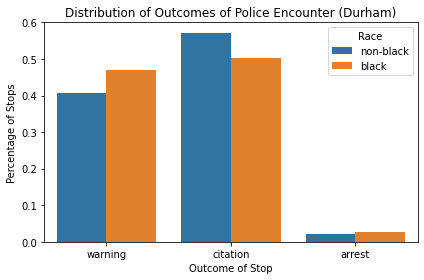

In [12]:
durham_non_black_outcome = durham_non_black['outcome_cat'].dropna()
durham_black_outcome = durham_black['outcome_cat'].dropna()

outcome_counts_non_black = durham_non_black_outcome.value_counts() / len(durham_non_black_outcome)
outcome_counts_black = durham_black_outcome.value_counts() / len(durham_black_outcome)

combined_counts = pd.DataFrame({
    'Outcome of Stop': outcome_counts_non_black.index,
    'non-black': outcome_counts_non_black.values,
    'black': outcome_counts_black.values
})

combined_counts_melted = pd.melt(combined_counts, id_vars='Outcome of Stop', 
                                 value_vars=['non-black', 'black'], 
                                 var_name='Race', value_name='Percentage of Stops')

# Set plot style
plt.figure(figsize=(10, 6))

# Plot 1: Distribution of arrests by race (Durham)
plt.figure()
sns.barplot(x='Outcome of Stop', y='Percentage of Stops', hue='Race', data=combined_counts_melted, order=['warning', 'citation', 'arrest'])
#sns.barplot(x=['warning', 'citation', 'arrest'], y=list(outcome_counts_non_black[[1,0,2]])), 
#sns.barplot(x=['warning', 'citation', 'arrest'], y=list(outcome_counts_black[[1,0,2]]))
plt.title('Distribution of Outcomes of Police Encounter (Durham)')
plt.xlabel('Outcome of Stop')
plt.ylabel('Percentage of Stops')
plt.legend(title='Race')
plt.tight_layout()
plt.savefig('mark_imgs/durham_encounter_distribution.png')
#plt.savefig("1.png")

In [13]:
print(outcome_counts_black['arrest'])
print(outcome_counts_non_black['arrest'])

print((outcome_counts_black['arrest'] - outcome_counts_non_black['arrest']) / outcome_counts_non_black['arrest'])

0.027602668813988266
0.020328049737942156
0.3578611411240345


<Figure size 720x432 with 0 Axes>

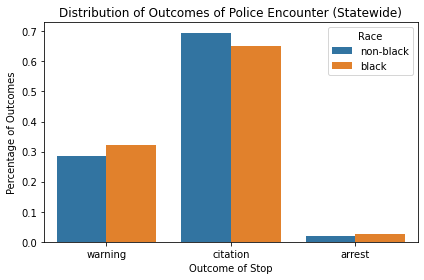

In [14]:
statewide_non_black_outcome = statewide_non_black['outcome_cat'].dropna()
statewide_black_outcome = statewide_black['outcome_cat'].dropna()

outcome_counts_non_black = statewide_non_black_outcome.value_counts() / len(statewide_non_black_outcome)
outcome_counts_black = statewide_black_outcome.value_counts() / len(statewide_black_outcome)

combined_counts = pd.DataFrame({
    'Outcome of Stop': outcome_counts_non_black.index,
    'non-black': outcome_counts_non_black.values,
    'black': outcome_counts_black.values
})

combined_counts_melted = pd.melt(combined_counts, id_vars='Outcome of Stop', 
                                 value_vars=['non-black', 'black'], 
                                 var_name='Race', value_name='Percentage of Stops')

# Set plot style
plt.figure(figsize=(10, 6))

# Plot 1: Distribution of arrests by race (Durham)
plt.figure()
sns.barplot(x='Outcome of Stop', y='Percentage of Stops', hue='Race', data=combined_counts_melted, order=['warning', 'citation', 'arrest'])
#sns.barplot(x=['warning', 'citation', 'arrest'], y=list(outcome_counts_non_black[[1,0,2]])), 
#sns.barplot(x=['warning', 'citation', 'arrest'], y=list(outcome_counts_black[[1,0,2]]))
plt.title('Distribution of Outcomes of Police Encounter (Statewide)')
plt.xlabel('Outcome of Stop')
plt.ylabel('Percentage of Outcomes')
plt.legend(title='Race')


plt.tight_layout()
plt.savefig('mark_imgs/statewide_encounter_distribution.png')
#plt.savefig("1.png")

In [15]:
print(outcome_counts_black['arrest'])
print(outcome_counts_non_black['arrest'])

print((outcome_counts_black['arrest'] - outcome_counts_non_black['arrest']) / outcome_counts_non_black['arrest'])

0.026865766934821254
0.019354300857600426
0.3881031989988457


In [16]:
combined_counts_melted

,Outcome of Stop,Race,Percentage of Stops
0,citation,non-black,0.694881
1,warning,non-black,0.285765
2,arrest,non-black,0.019354
3,citation,black,0.649789
4,warning,black,0.323346
5,arrest,black,0.026866


In [17]:
b_percentage = .371
pop = 267587

b_pop_durham = pop * b_percentage
nb_pop_durham = pop * (1 - b_percentage)

b_percentage = .215
pop = 9535483

b_pop_statewide = pop * b_percentage
nb_pop_statewide = pop * (1 - b_percentage)

In [18]:
nb_pop_durham

168312.223

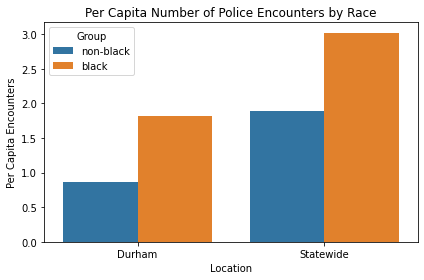

In [19]:
# Example data: per capita counts for each group and location
d_b_pc = len(durham_black) / b_pop_durham
d_nb_pc = len(durham_non_black) / nb_pop_durham
s_b_pc = len(statewide_black) / b_pop_statewide
s_nb_pc = len(statewide_non_black) / nb_pop_statewide

data = {
    'Location': ['Durham', 'Durham', 'Statewide', 'Statewide'],
    'Group': ['black', 'non-black', 'black', 'non-black'],
    'Per Capita Encounters': [d_b_pc, d_nb_pc, s_b_pc, s_nb_pc]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Plot the data
sns.barplot(x='Location', y='Per Capita Encounters', hue='Group', data=df, hue_order=['non-black', 'black'])
plt.title('Per Capita Number of Police Encounters by Race')
plt.tight_layout()
plt.savefig('mark_imgs/per_capita_encounters.png')

In [20]:
len(durham_black)

180851

In [21]:
len(durham_non_black)

145172

In [22]:
len(durham_black)

180851

In [23]:
d_b_pc

1.8217215436303624

In [24]:
d_nb_pc

0.8625160871412173

In [25]:
s_b_pc

3.0182756635473806

In [26]:
s_nb_pc

1.8835144881665253

In [28]:
print((d_b_pc - d_nb_pc) / d_nb_pc)

print((s_b_pc - s_nb_pc) / s_nb_pc)

1.1121015257447564
0.6024701070844796


In [17]:
durham_data['datetime_month'] = durham_data['datetime'].dt.to_period('M').dt.to_timestamp()
statewide_data['datetime_month'] = statewide_data['datetime'].dt.to_period('M').dt.to_timestamp()

In [18]:
durham_data[['datetime_month', 'outcome_cat']].groupby(by='datetime_month', axis=0).count()

/tmp/ipykernel_618230/2815173037.py:1: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  durham_data[['datetime_month', 'outcome_cat']].groupby(by='datetime_month', axis=0).count()


,outcome_cat
datetime_month,
2002-01-01,1774
2002-02-01,1656
2002-03-01,1808
2002-04-01,1742
2002-05-01,1603
...,...
2015-08-01,1833
2015-09-01,1928
2015-10-01,1888


/tmp/ipykernel_618230/3395096893.py:1: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  plt.plot(durham_data.dropna(subset='datetime_month')[['datetime_month', 'outcome_cat']].groupby(by='datetime_month', axis=0).count() / len(durham_data.dropna(subset='datetime_month')))
/tmp/ipykernel_618230/3395096893.py:2: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  plt.plot(statewide_data.dropna(subset='datetime_month')[['datetime_month', 'outcome_cat']].groupby(by='datetime_month', axis=0).count() / len(statewide_data.dropna(subset='datetime_month')))


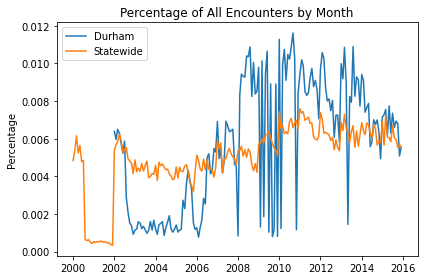

In [20]:
plt.plot(durham_data.dropna(subset='datetime_month')[['datetime_month', 'outcome_cat']].groupby(by='datetime_month', axis=0).count() / len(durham_data.dropna(subset='datetime_month')))
plt.plot(statewide_data.dropna(subset='datetime_month')[['datetime_month', 'outcome_cat']].groupby(by='datetime_month', axis=0).count() / len(statewide_data.dropna(subset='datetime_month')))

plt.title('Percentage of All Encounters by Month')
plt.legend(['Durham' ,'Statewide'])
plt.ylabel('Percentage')

plt.tight_layout()
plt.savefig('mark_imgs/stops_by_month.png')

/tmp/ipykernel_618230/3990204204.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['datetime_month'] = df['datetime'].dt.to_period('M').dt.to_timestamp()
/tmp/ipykernel_618230/3990204204.py:6: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  return df.dropna(subset=['datetime_month', 'outcome_cat'])[['datetime_month', 'outcome_cat']].groupby(by='datetime_month', axis=0).apply(percent_arrest)['outcome_cat']
/tmp/ipykernel_618230/3990204204.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exc

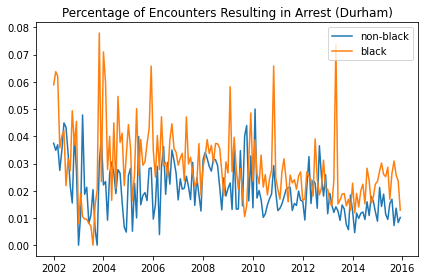

In [31]:
def percent_arrest(col):
    return (col == 'arrest').sum() / len(col)

def get_arrest_percentage(df):
    df['datetime_month'] = df['datetime'].dt.to_period('M').dt.to_timestamp()
    return df.dropna(subset=['datetime_month', 'outcome_cat'])[['datetime_month', 'outcome_cat']].groupby(by='datetime_month', axis=0).apply(percent_arrest)['outcome_cat']

plt.plot(get_arrest_percentage(durham_non_black))
plt.plot(get_arrest_percentage(durham_black))
plt.legend(['non-black', 'black'], loc='upper right')
plt.title('Percentage of Encounters Resulting in Arrest (Durham)')

plt.tight_layout()
plt.savefig('mark_imgs/durham_percent_arrest_time.png')

In [22]:
print(get_arrest_percentage(durham_non_black).std())
print(get_arrest_percentage(durham_black).std())

0.009932898050199214
0.013448182705319939


/tmp/ipykernel_618230/430573956.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['datetime_month'] = df['datetime'].dt.to_period('M').dt.to_timestamp()
/tmp/ipykernel_618230/430573956.py:6: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  return df.dropna(subset=['datetime_month', 'outcome_cat'])[['datetime_month', 'outcome_cat']].groupby(by='datetime_month', axis=0).apply(percent_arrest)['outcome_cat']
/tmp/ipykernel_618230/430573956.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclud

/tmp/ipykernel_618230/430573956.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['datetime_month'] = df['datetime'].dt.to_period('M').dt.to_timestamp()
/tmp/ipykernel_618230/430573956.py:6: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  return df.dropna(subset=['datetime_month', 'outcome_cat'])[['datetime_month', 'outcome_cat']].groupby(by='datetime_month', axis=0).apply(percent_arrest)['outcome_cat']
/tmp/ipykernel_618230/430573956.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclud

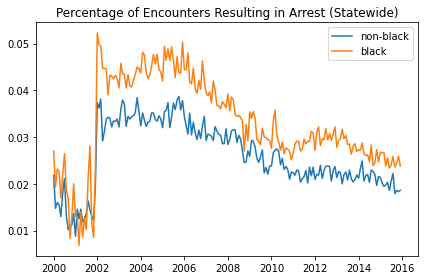

In [23]:
plt.plot(get_arrest_percentage(statewide_non_black))
plt.plot(get_arrest_percentage(statewide_black))
plt.legend(['non-black', 'black'], loc='upper right')
plt.title('Percentage of Encounters Resulting in Arrest (Statewide)')

plt.tight_layout()
plt.savefig('mark_imgs/statewide_percent_arrest_time.png')

In [24]:
print(get_arrest_percentage(statewide_non_black).std())
print(get_arrest_percentage(statewide_black).std())

/tmp/ipykernel_618230/430573956.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['datetime_month'] = df['datetime'].dt.to_period('M').dt.to_timestamp()
/tmp/ipykernel_618230/430573956.py:6: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  return df.dropna(subset=['datetime_month', 'outcome_cat'])[['datetime_month', 'outcome_cat']].groupby(by='datetime_month', axis=0).apply(percent_arrest)['outcome_cat']
/tmp/ipykernel_618230/430573956.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclud

0.007118287987310147


/tmp/ipykernel_618230/430573956.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['datetime_month'] = df['datetime'].dt.to_period('M').dt.to_timestamp()


0.009831837949273838


/tmp/ipykernel_618230/430573956.py:6: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  return df.dropna(subset=['datetime_month', 'outcome_cat'])[['datetime_month', 'outcome_cat']].groupby(by='datetime_month', axis=0).apply(percent_arrest)['outcome_cat']
/tmp/ipykernel_618230/430573956.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.dropna(subset=['datetime_month', 'outcome_cat'])[['datetime_month', 'outcome_cat']].groupby(by='datetime_month', axis=0).apply(percent_arrest)['outcome_cat']


In [ ]:
sns.histplot(durham_data['datetime_month'])

In [ ]:
durham_data['datetime']

In [ ]:
durham_data['datetime_month']